In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs

# 1. Read the file
df = pd.read_csv('../Data/career_pivot_results.csv')

# 2. Clean the Data.
df.set_index(['O*NET-SOC Code', 'Title'], inplace=True)


# 3. Create the Math Matrix (X)
X = df.values

print("Data Loaded.")
print(f"Dimensions: {X.shape}")

df.head()

Data Loaded.
Dimensions: (894, 87)


,,A: Arm-Hand Steadiness,A: Auditory Attention,A: Category Flexibility,A: Control Precision,A: Deductive Reasoning,A: Depth Perception,A: Dynamic Flexibility,A: Dynamic Strength,A: Explosive Strength,A: Extent Flexibility,...,S: Science,S: Service Orientation,S: Social Perceptiveness,S: Speaking,S: Systems Analysis,S: Systems Evaluation,S: Technology Design,S: Time Management,S: Troubleshooting,S: Writing
O*NET-SOC Code,Title,,,,,,,,,,,,,,,,,,,,,
11-1011.00,Chief Executives,0.50,2.00,4.00,0.75,4.75,1.38,0.0,0.25,0.00,0.00,...,1.185,3.250,4.185,4.50,4.62,4.625,1.315,4.375,1.000,4.250
11-1011.03,Chief Sustainability Officers,0.00,1.75,3.50,0.50,4.75,1.75,0.0,0.00,0.00,0.00,...,2.000,3.250,3.880,4.06,3.94,3.940,1.500,3.630,0.500,4.185
11-1021.00,General and Operations Managers,0.88,2.00,3.25,0.12,4.12,1.62,0.0,0.12,0.38,0.25,...,1.060,3.185,3.875,4.06,3.12,3.185,1.060,3.750,1.375,3.690
11-2011.00,Advertising and Promotions Managers,0.50,1.25,3.88,0.12,4.50,1.00,0.0,0.00,0.00,0.00,...,1.120,3.185,4.000,4.06,3.12,3.435,1.250,3.690,0.500,3.815
11-2021.00,Marketing Managers,0.12,1.62,3.62,0.00,4.38,0.75,0.0,0.25,0.00,0.00,...,1.625,3.185,3.940,4.00,3.50,3.625,1.315,3.625,0.500,3.565


In [7]:
# 5. Scale the Data (Z-Score Normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# The scaled data (Z-score, usually between -2 and +2)
print("Scaled First Value:", X_scaled[0][0])

# Verify Mean is ~0 and Std is ~1
print("New Mean:", X_scaled.mean().round(2))
print("New Std:", X_scaled.std().round(2))

Scaled First Value: -1.4187069226581608
New Mean: 0.0
New Std: 1.0


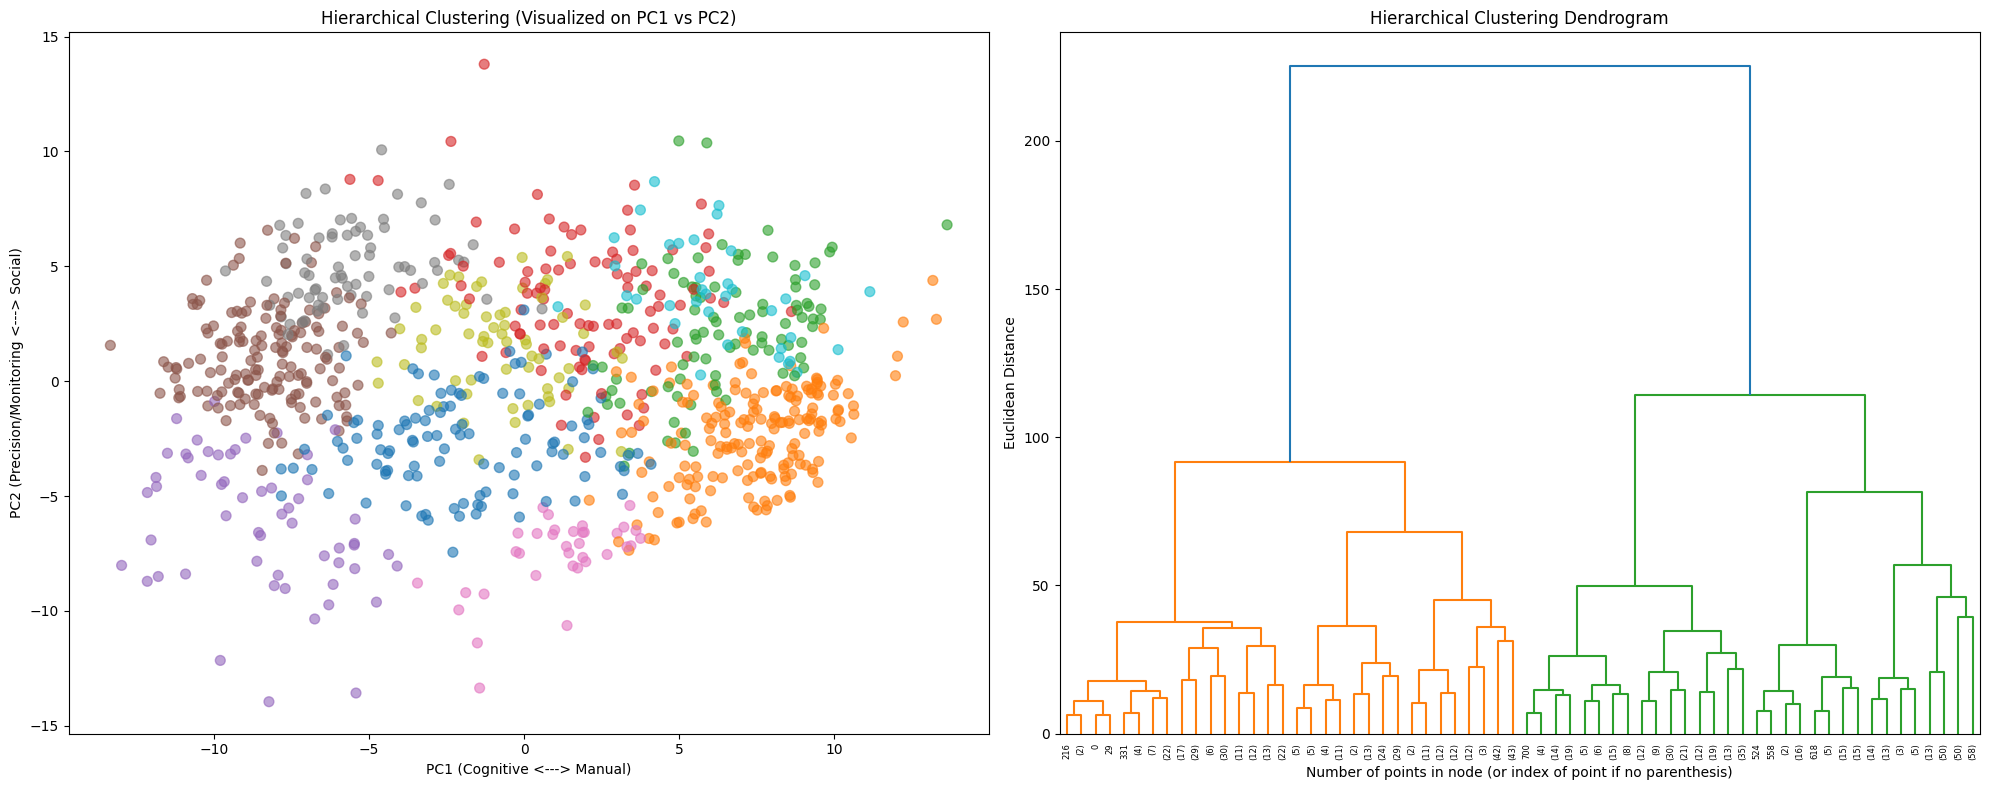

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# --- STEP 1: PREPARE DATA ---
# We need PCA coordinates solely for the scatter plot visualization
pca_viz = PCA(n_components=2)
coords = pca_viz.fit_transform(X_scaled)  # This creates PC1 and PC2

# --- STEP 2: FIT MODELS ---

# Model A: The one that assigns labels (Choose your K, e.g., 10 or 12)
# Note: We fit on X_scaled (the full 120D data), not the PCA coords
clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = clustering.fit_predict(X_scaled) 

# Model B: The full tree for the Dendrogram
# distance_threshold=0 ensures the full tree is computed
agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
agg.fit(X_scaled)

# --- STEP 3: DEFINE THE HELPER FUNCTION ---
# (This is the exact function you provided, no changes needed)
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

# --- STEP 4: PLOT SIDE-BY-SIDE ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# PLOT 1: The Scatter Plot (Using PCA Coords)
# We plot PC1 vs PC2, but we color them using the Hierarchical Labels
scatter = ax1.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='tab10', s=50, alpha=0.6)
ax1.set_title("Hierarchical Clustering (Visualized on PC1 vs PC2)")
ax1.set_xlabel("PC1 (Cognitive <---> Manual)")
ax1.set_ylabel("PC2 (Precision/Monitoring <---> Social)")

# PLOT 2: The Dendrogram
plt.sca(ax2)
# truncate_mode='level' hides the bottom messy part of the tree
# p=5 means "show me the top 5 levels of the tree"
plot_dendrogram(agg, truncate_mode='level', p=5) 
ax2.set_title("Hierarchical Clustering Dendrogram")
ax2.set_xlabel("Number of points in node (or index of point if no parenthesis)")
ax2.set_ylabel("Euclidean Distance")

plt.tight_layout()
plt.show()

In [9]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# 1. Define the parameters to test
linkage_methods = ['ward', 'complete', 'average']
k_range = range(5, 20)  # Test between 5 and 20 clusters

best_score = -1
best_params = {}

print(f"{'Linkage':<10} | {'K':<3} | {'Score':<6}")
print("-" * 25)

# 2. Loop through every combination
for method in linkage_methods:
    for k in k_range:
        # Run Model
        hc = AgglomerativeClustering(n_clusters=k, linkage=method)
        labels = hc.fit_predict(X_scaled)
        
        # Calculate Score
        score = silhouette_score(X_scaled, labels)
        
        # Print progress
        print(f"{method:<10} | {k:<3} | {score:.3f}")
        
        # Save best
        if score > best_score:
            best_score = score
            best_params = {'linkage': method, 'k': k}

print("-" * 25)
print(f"🏆 BEST MODEL: Linkage='{best_params['linkage']}', K={best_params['k']} (Score: {best_score:.3f})")

Linkage    | K   | Score 
-------------------------
ward       | 5   | 0.148
ward       | 6   | 0.145
ward       | 7   | 0.138
ward       | 8   | 0.103
ward       | 9   | 0.101
ward       | 10  | 0.103
ward       | 11  | 0.105
ward       | 12  | 0.090
ward       | 13  | 0.090
ward       | 14  | 0.094
ward       | 15  | 0.097
ward       | 16  | 0.088
ward       | 17  | 0.091
ward       | 18  | 0.093
ward       | 19  | 0.093
complete   | 5   | 0.136
complete   | 6   | 0.138
complete   | 7   | 0.121
complete   | 8   | 0.126
complete   | 9   | 0.109
complete   | 10  | 0.089
complete   | 11  | 0.099
complete   | 12  | 0.094
complete   | 13  | 0.088
complete   | 14  | 0.085
complete   | 15  | 0.063
complete   | 16  | 0.055
complete   | 17  | 0.068
complete   | 18  | 0.071
complete   | 19  | 0.072
average    | 5   | 0.084
average    | 6   | 0.169
average    | 7   | 0.138
average    | 8   | 0.115
average    | 9   | 0.133
average    | 10  | 0.119
average    | 11  | 0.099
average    | 12  | 0.07

In [10]:
from scipy.cluster.hierarchy import cophenet, linkage
from scipy.spatial.distance import pdist

# 1. Calculate the Linkage Matrix (The Tree)
Z = linkage(X_scaled, method=best_params['linkage']) 

# 2. Calculate Cophenetic Correlation Coefficient
c, coph_dists = cophenet(Z, pdist(X_scaled))

print(f"Cophenetic Correlation: {c:.3f}")

Cophenetic Correlation: 0.652


In [11]:
# 1. Refit the Best Model
final_hc = AgglomerativeClustering(
    n_clusters=best_params['k'], 
    linkage=best_params['linkage']
)
final_labels = final_hc.fit_predict(X_scaled)

# 2. Create a temporary dataframe for inspection
# (Ensure your 'df' still has the Titles in the index!)
df['Final_Cluster'] = final_labels

# 3. Print a sample from each cluster
for i in range(best_params['k']):
    print(f"\n--- CLUSTER {i} ---")
    # Get all jobs in this cluster
    jobs_in_cluster = df[df['Final_Cluster'] == i].index.get_level_values('Title')
    
    # Print up to 10 random examples
    sample_size = min(len(jobs_in_cluster), 10)
    print(np.random.choice(jobs_in_cluster, sample_size, replace=False))


--- CLUSTER 0 ---
['Accountants and Auditors' 'Community Health Workers' 'Registered Nurses'
 'Manufacturing Engineers' 'Allergists and Immunologists'
 'Computer Systems Engineers/Architects'
 'Molecular and Cellular Biologists'
 'Special Education Teachers, Preschool' 'Chemical Engineers'
 'Labor Relations Specialists']

--- CLUSTER 1 ---
['Telemarketers'
 'Door-to-Door Sales Workers, News and Street Vendors, and Related Workers'
 'Cleaners of Vehicles and Equipment'
 'Refuse and Recyclable Material Collectors'
 'Crossing Guards and Flaggers' 'Postal Service Mail Carriers'
 'Packers and Packagers, Hand'
 'Graders and Sorters, Agricultural Products'
 'Pressers, Textile, Garment, and Related Materials' 'Models']

--- CLUSTER 2 ---
['Etchers and Engravers' 'Photonics Technicians'
 'Correctional Officers and Jailers'
 'Court Reporters and Simultaneous Captioners'
 'Industrial Truck and Tractor Operators'
 'Model Makers, Metal and Plastic' 'Archivists'
 'Audiovisual Equipment Installers a

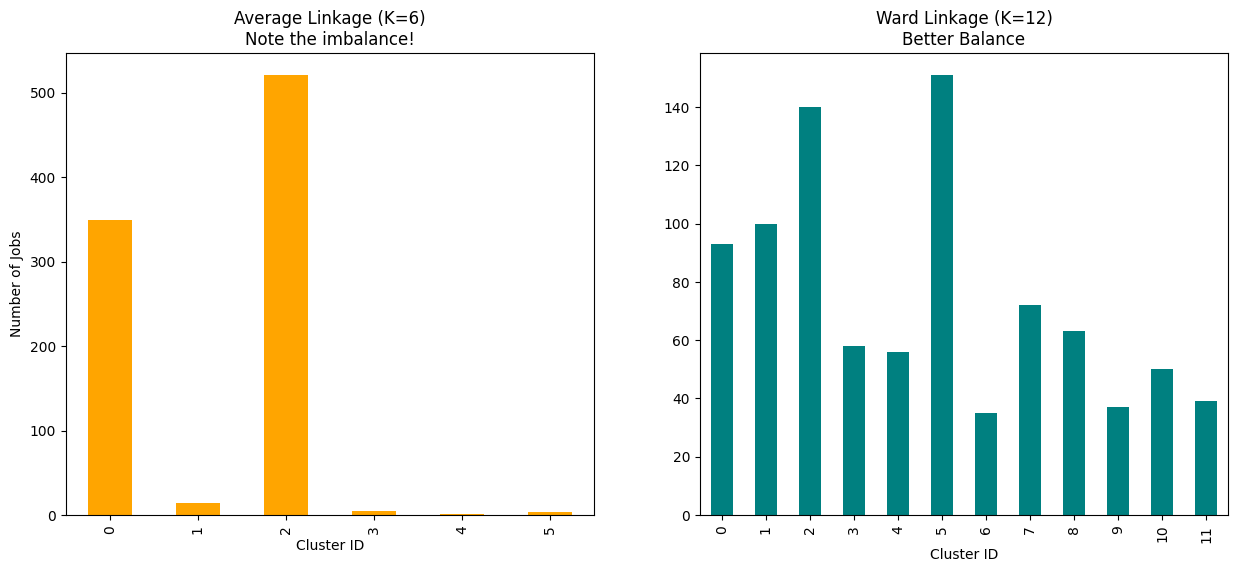

In [19]:
# 1. Re-run your "Best" model (Average, K=6) to show the flaw
hc_avg = AgglomerativeClustering(n_clusters=6, linkage='average')
df['Avg_Cluster_Labels'] = hc_avg.fit_predict(X_scaled)

# 2. Run the "Better" model (Ward, K=12)
hc_ward = AgglomerativeClustering(n_clusters=12, linkage='ward')
df['Ward_Cluster_Labels'] = hc_ward.fit_predict(X_scaled)

# 3. Plot comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot Average Cluster Sizes
df['Avg_Cluster_Labels'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='orange')
ax[0].set_title("Average Linkage (K=6)\nNote the imbalance!")
ax[0].set_xlabel("Cluster ID")
ax[0].set_ylabel("Number of Jobs")

# Plot Ward Cluster Sizes
df['Ward_Cluster_Labels'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='teal')
ax[1].set_title("Ward Linkage (K=12)\nBetter Balance")
ax[1].set_xlabel("Cluster ID")

plt.show()

*** FINAL MODEL RESULTS (Ward, K=12) ***

--- CLUSTER 0 (Total Jobs: 93) ---
Samples: Materials Engineers; Physicists; Special Effects Artists and Animators; Manufacturing Engineers; Industrial Engineers; Database Administrators; Logistics Engineers; Brownfield Redevelopment Specialists and Site Managers


--- CLUSTER 1 (Total Jobs: 100) ---
Samples: Farm and Home Management Educators; Facilities Managers; Postmasters and Mail Superintendents; Meeting, Convention, and Event Planners; Administrative Services Managers; First-Line Supervisors of Helpers, Laborers, and Material Movers, Hand; Industrial Production Managers; Surveyors


--- CLUSTER 2 (Total Jobs: 140) ---
Samples: Sales Representatives, Wholesale and Manufacturing, Except Technical and Scientific Products; Industrial Ecologists; Genetic Counselors; Forestry and Conservation Science Teachers, Postsecondary; School Psychologists; Patient Representatives; Advertising Sales Agents; Educational, Guidance, and Career Counselors an

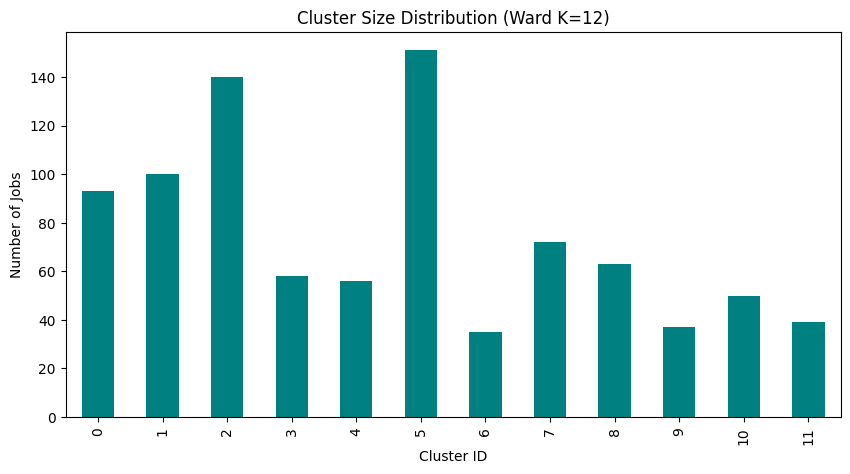

In [21]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# 1. Initialize and Run the Model (Ward, K=12)
hc_ward = AgglomerativeClustering(n_clusters=12, linkage='ward')
labels = hc_ward.fit_predict(X_scaled)

# 2. Assign labels back to the DataFrame
# (This adds a column 'Ward_Cluster' to your data)
df['Ward_Cluster'] = labels

# 3. Print the "Bartender Test" (Cluster Inspection)
print(f"*** FINAL MODEL RESULTS (Ward, K=12) ***\n")

for i in range(12):
    # Get all job titles in this cluster
    # Note: We use .get_level_values('Title') because Title is in the Index
    jobs_in_cluster = df[df['Ward_Cluster'] == i].index.get_level_values('Title')
    
    # Calculate size
    size = len(jobs_in_cluster)
    
    # Pick 8 random examples to display (or fewer if the cluster is small)
    sample_size = min(size, 8)
    sample_jobs = np.random.choice(jobs_in_cluster, sample_size, replace=False)
    
    print(f"--- CLUSTER {i} (Total Jobs: {size}) ---")
    print("Samples:", "; ".join(sample_jobs))
    print("\n")

# 4. (Optional) Check the Balance visually
# This proves your clusters aren't just one giant blob anymore
df['Ward_Cluster'].value_counts().sort_index().plot(
    kind='bar', color='teal', figsize=(10, 5), title="Cluster Size Distribution (Ward K=12)"
)
plt.xlabel("Cluster ID")
plt.ylabel("Number of Jobs")
plt.show()

In [22]:
# Save to CSV
df.to_csv("Final_Career_Pivots_Ward12.csv")
print("Saved 'Final_Career_Pivots_Ward12.csv' successfully.")

Saved 'Final_Career_Pivots_Ward12.csv' successfully.


In [23]:
from sklearn.metrics.pairwise import euclidean_distances

def find_hierarchical_pivots(input_job, top_n=5):
    # 1. Locate the Job in your DataFrame
    # We use .xs to find the row even if 'Title' is part of the Index
    try:
        # Get the row with the data (X_scaled) and the Cluster Label
        job_row = df.xs(input_job, level='Title')
        
        # Extract the Cluster ID (The "Room" this job lives in)
        my_cluster = job_row['Ward_Cluster'].iloc[0]
        
        # Extract the Feature Vector (The numbers used for math)
        # We drop the cluster label column to get just the skills
        my_vector = job_row.drop(columns=['Ward_Cluster']).values.reshape(1, -1)
        
    except KeyError:
        print(f"❌ Error: '{input_job}' not found. Check spelling.")
        return

    # 2. Get all "Roommates" (Jobs in the same cluster)
    # We filter the dataframe to only look at this specific cluster
    roommates = df[df['Ward_Cluster'] == my_cluster].copy()
    
    # Remove the input job itself from the list
    # (We have to reset index temporarily to filter by Title string easily)
    roommates = roommates[roommates.index.get_level_values('Title') != input_job]

    # 3. Calculate Distance to find the "Closest Roommates"
    # We calculate distance between "Input Job" and "All Roommates"
    roommate_vectors = roommates.drop(columns=['Ward_Cluster']).values
    dists = euclidean_distances(my_vector, roommate_vectors)
    
    # Add distance score to the list (Lower distance = Better match)
    roommates['Distance'] = dists[0]
    
    # 4. Sort and Print
    best_pivots = roommates.sort_values('Distance').head(top_n)
    
    print(f"🎯 Pivots for '{input_job}' (Cluster {my_cluster})")
    print("-" * 40)
    for title, row in best_pivots.iterrows():
        # title is (Code, JobName), we just want JobName
        print(f"• {title[1]} (Diff: {row['Distance']:.2f})")
    print("-" * 40)
    print("\n")

# --- TEST IT NOW ---
find_hierarchical_pivots('Veterinarians')
find_hierarchical_pivots('Sales Representatives, Wholesale and Manufacturing, Except Technical and Scientific Products')
find_hierarchical_pivots('Physicists')

🎯 Pivots for 'Veterinarians' (Cluster 9)
----------------------------------------
• Obstetricians and Gynecologists (Diff: 3.76)
• Nurse Midwives (Diff: 3.85)
• Sports Medicine Physicians (Diff: 3.97)
• Urologists (Diff: 4.01)
• Physical Medicine and Rehabilitation Physicians (Diff: 4.05)
----------------------------------------


🎯 Pivots for 'Sales Representatives, Wholesale and Manufacturing, Except Technical and Scientific Products' (Cluster 2)
----------------------------------------
• Insurance Sales Agents (Diff: 4.96)
• Insurance Underwriters (Diff: 5.02)
• Human Resources Specialists (Diff: 5.18)
• Social and Human Service Assistants (Diff: 5.22)
• Loan Officers (Diff: 5.24)
----------------------------------------


🎯 Pivots for 'Physicists' (Cluster 0)
----------------------------------------
• Bioinformatics Scientists (Diff: 5.91)
• Aerospace Engineers (Diff: 5.92)
• Water/Wastewater Engineers (Diff: 6.00)
• Mining and Geological Engineers, Including Mining Safety Engineer